<a href="https://colab.research.google.com/github/swetha-guggal/CEDURA_TECH/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Loading Dataset

In [2]:
df=pd.read_csv('/content/Netflix_title.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Basic information of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Dropping unnecessary columns

In [4]:
df.drop(['show_id','description'],axis=1,inplace=True)

In [5]:
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


# Checking duplicates

In [6]:
df.duplicated().sum()

0

# Checking missing values

In [7]:
df.isnull().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0


In [8]:
df.isnull().sum()/len(df)*100

,0
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064
listed_in,0.000000


# Data Cleaning

In [9]:
df.fillna({'cast':'NA'}, inplace=True)
df.fillna({'director':'Na'},inplace=True)
df.fillna({'country':'-'},inplace=True)
df.fillna({'rating':'-'},inplace=True)
df.fillna({'duration':'-'},inplace=True)
df.fillna({'date_added':'-'},inplace=True)

In [10]:
df.isnull().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


# Data Transformation

In [11]:
df.rename(columns={"listed_in":"categories"},inplace=True)

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [13]:
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,categories,year_added,month_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,September
1,TV Show,Blood & Water,Na,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,September
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",-,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0,September
3,TV Show,Jailbirds New Orleans,Na,NA,-,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0,September
4,TV Show,Kota Factory,Na,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0,September


# Data Visualization

In [14]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

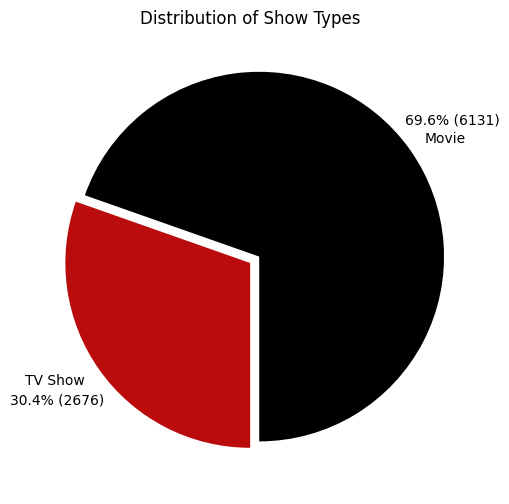

In [15]:
type_counts=df['type'].value_counts()
type_index=type_counts.index
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_index, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(type_counts) / 100),startangle=270, colors=['#000000','#ba0c0c'],explode = (0.06, 0),pctdistance=1.28)
plt.title('Distribution of Show Types')
plt.show()

**Insights**
- Chart illustrates the distribution of show types.
- Netflix produces more movie than TV show

In [16]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', '-',
       'TV-Y7-FV', 'UR'], dtype=object)

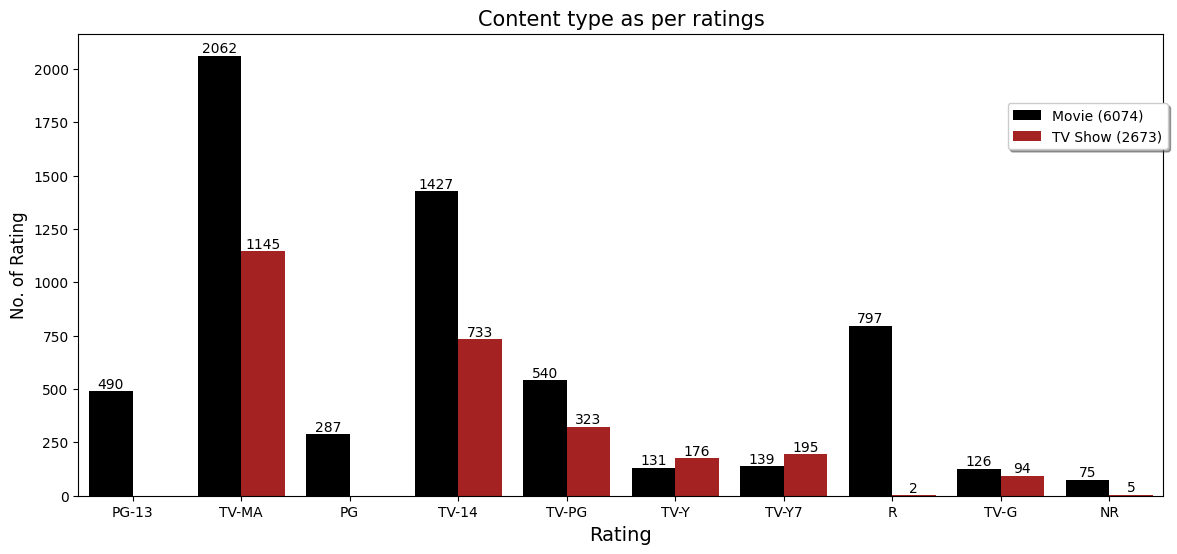

In [17]:
ratings_counts = df['rating'].value_counts()

# Filter the original DataFrame (df) based on ratings that occur more than 50 times
netflix_filtered = df[df['rating'].isin(ratings_counts[ratings_counts > 50].index)]

custom_palette={'Movie':'#000000','TV Show':'#ba0c0c'}
plt.figure(figsize=(14, 6))
chart = sns.countplot(data = netflix_filtered, x = 'rating', hue = 'type', palette = custom_palette)
plt.title('Content type as per ratings', fontsize = 15)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('No. of Rating',fontsize = 12)

legend_labels = netflix_filtered['type'].unique()
for label in legend_labels:
    total_count = netflix_filtered[netflix_filtered['type'] == label].shape[0]
    label_with_count = f"{label} ({total_count})"
    legend_labels[legend_labels == label] = label_with_count

chart.legend(labels=legend_labels, loc = 'center left', bbox_to_anchor=(0.850,0.80),
          ncol = 1, fancybox = True, shadow = True)

for bars in chart.containers:
    chart.bar_label(bars)
plt.show()

**Insights**
- Netflix produces TV-MA, TV-14 and TV-PG shows more than other ratings shows.

In [18]:
# Extract the count of each unique director and select the top 10 directors

data = df['director'].value_counts().iloc[1:11].to_dict()
netflix2 = pd.DataFrame(list(data.items()), columns=['Director', 'Count'])

red_black_palette = ['#980a0a','#ba0c0c', '#635454','#dc4848','#383434','#564d4d']

fig = px.pie(netflix2, values='Count', names='Director', title='Top Directors and Their Contribution',
             hole=0.3, labels={'Count': 'Director Count'},color_discrete_sequence=red_black_palette)

fig.update_layout(height=600, width=800)
fig.update_layout(legend=dict(x=1.4, y=0.5, traceorder='normal', orientation='v'))
fig.update_layout(title_x=0.5)
fig.show()

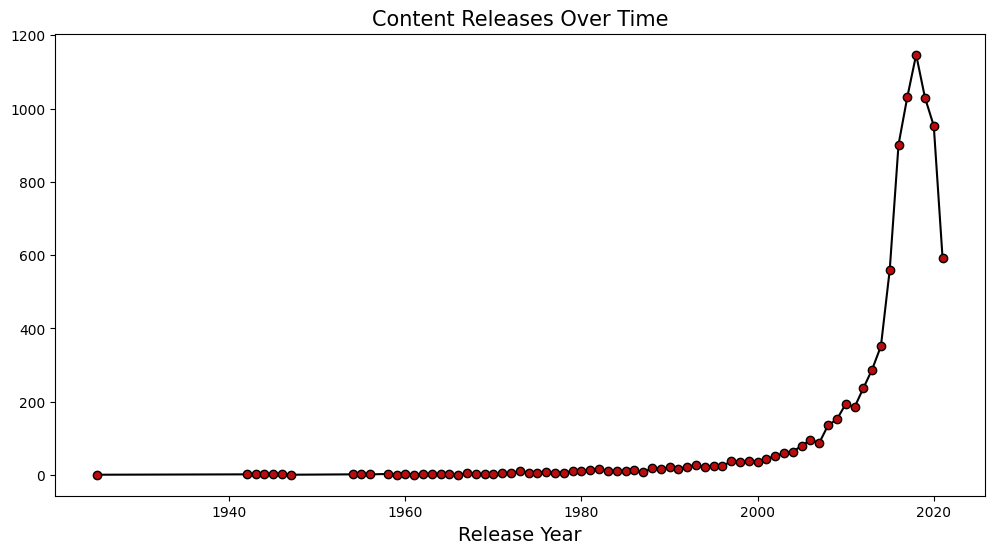

In [19]:
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', markerfacecolor='#ba0c0c', color='#000000', figsize=(12, 6))

plt.title('Content Releases Over Time',fontsize=15)
plt.xlabel('Release Year',fontsize=14)
plt.show()


In [20]:
# Extract the top 10 genres from the 'categories' column and count their occurrences

top_genres = df['categories'].str.split(', ', expand=True).stack().value_counts().head(10)
df_treemap = pd.DataFrame({'Genre': top_genres.index, 'Number of Releases': top_genres.values})
df_treemap['percent'] = df_treemap['Number of Releases'] / df_treemap['Number of Releases'].sum()

netflix_color_palette = ['#980a0a','#ba0c0c', '#df0707','#d94747','#f48b8b','#a6a0a0','#8c8c8c','#5b5757','#3e3d3d','#000000']  # Netflix Red and White

# Create a custom treemap using plotly.graph_objects
fig = go.Figure(go.Treemap(
    labels=df_treemap['Genre'],
    parents=[""] * len(df_treemap['Genre']),
    values=df_treemap['Number of Releases'],
    textinfo="label+percent entry",
    marker=dict(colors=netflix_color_palette ,
    line=dict(width=2, color="black"))
    ))

fig.update_layout(title='Top 10 Netflix Genres',title_x=0.5, margin=dict(l=20, r=20, t=60, b=20), width=800, height=600)
fig.show()

In [21]:
df[df['country'] != '-']['country'].value_counts().head(4)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245


In [22]:
df_top4 = df[(df["country"]=="United States") | (df["country"]=="India") | (df["country"]=="United Kingdom") |
             (df["country"]=="Japan")]

In [23]:
df_top10=df['rating'].value_counts().head(10)

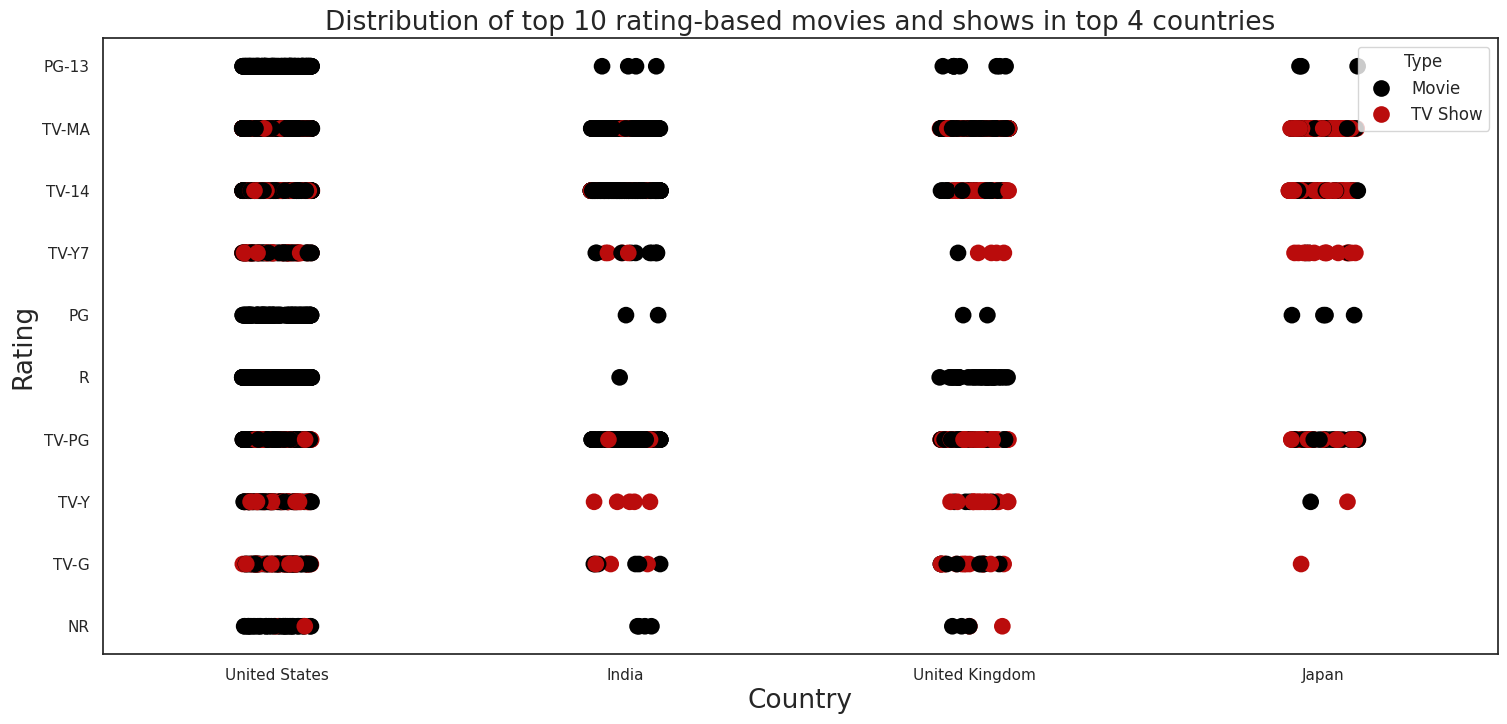

In [24]:
top_ratings = df_top4['rating'].value_counts().head(10).index
df_top10_ratings = df_top4[df_top4['rating'].isin(top_ratings)]

cp={'Movie':'#000000','TV Show':'#ba0c0c'}

plt.figure(figsize=(18, 8))
sns.set_theme(style="white")

sns.stripplot(x="country", y="rating", hue="type", data=df_top10_ratings,
              order=["United States", "India", "United Kingdom", "Japan"],
              palette=cp, size=12)

plt.xlabel('Country', fontsize=19)
plt.ylabel('Rating', fontsize=19)
plt.legend(loc="best", title="Type", fontsize=12)
plt.title("Distribution of top 10 rating-based movies and shows in top 4 countries", fontsize=19)

plt.show()

**Insights**
- In United States, Netflix prdouces all kind of shows evenly in all types of rating.
- In India, Netflix produces very few shows of PG,PG-13,NR,R rated shows.
- In United Kingdom, Netflix produces very few shows of PG,TV-Y7,NR rated shows.
- In Japan, Netflix produces very few shows of TV-G, TV-Y, and PG-13 ratings, and does not produce R and NR rated shows.

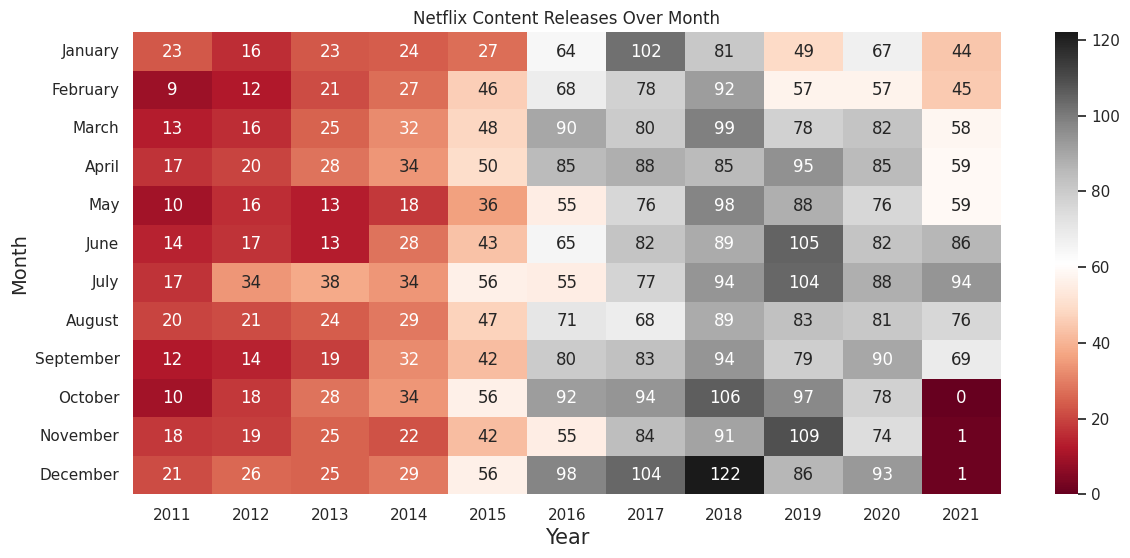

In [26]:
# Filter the DataFrame to include only rows where the 'release_year' is greater than or equal to the current year minus 13

df_filtered = df[df['release_year'] >= (pd.Timestamp.now().year - 13)]
heatmap_data = df_filtered.groupby(['release_year', 'month_added']).size().unstack().fillna(0)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data[month_order]

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.T, annot=True, cmap="RdGy", fmt='g')

plt.title('Netflix Content Releases Over Month')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Month',fontsize=14)

plt.show()

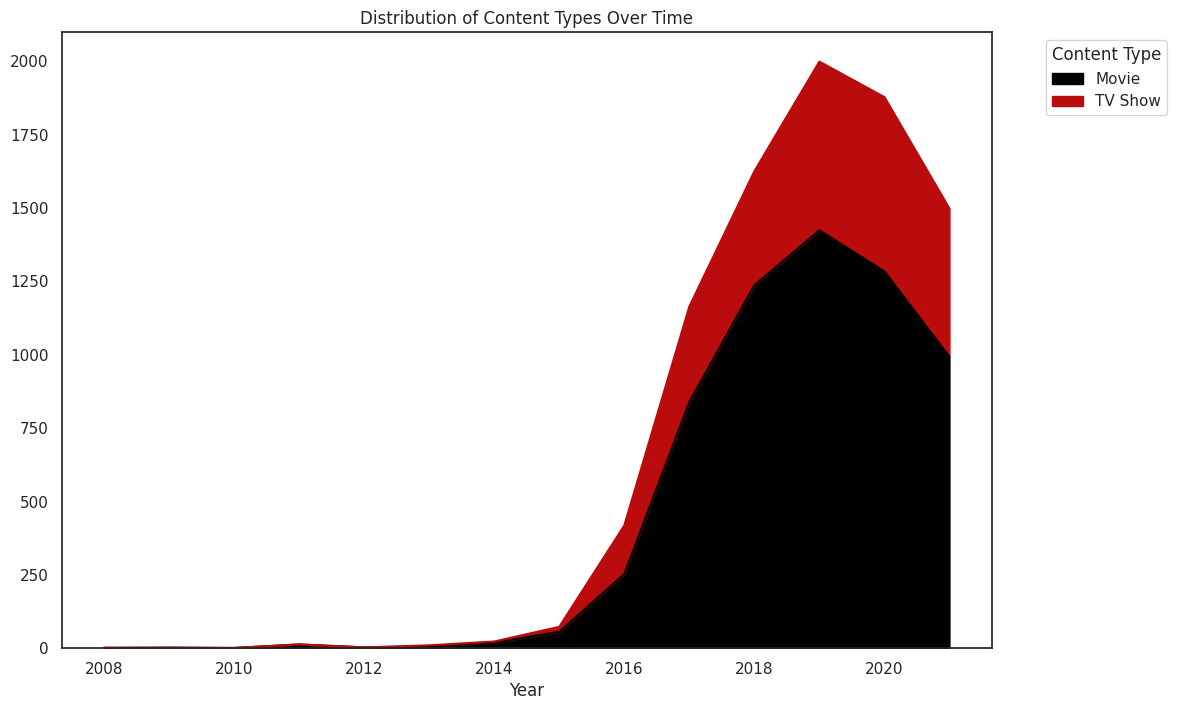

In [27]:
content_type_distribution = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
netflix_palette = {'Movie':'#000000','TV Show':'#ba0c0c'}
content_type_distribution.plot.area(stacked=True, color=[netflix_palette.get(type, '#CCCCCC') for type in content_type_distribution.columns], figsize=(12, 8))

plt.title('Distribution of Content Types Over Time')
plt.xlabel('Year')
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
# Filter the DataFrame to include only rows where the 'country' column is not equal to '-',considering only the top 5 countries
country_name = df[df['country']!='-']['country'].value_counts().head(5)
country_name

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


In [29]:
red_black_palette = {
    'United States': '#bd1e1e',
    'India': '#df0c0c',
    'United Kingdom': '#fc0a0a',
    'Japan': '#e15656',
    'South Korea': '#f29595'
}

fig = px.scatter(
    country_name, x=country_name.values, y=country_name.index,
    color=country_name.index,
    color_discrete_map=red_black_palette,
    size=country_name.values,  # Use the 'Values' column to determine marker sizes
    size_max=100,
    labels={'Values': country_name.values, 'Country': country_name.index},
)

fig.update_layout(
    title='Top 5 Countries with the Most Netflix Content',
    title_x=0.5,
    height=600,
    xaxis_title='Values',
    yaxis_title='Country',
    xaxis_title_font=dict(
        family='Arial',
        size=24,
    ),
     yaxis_title_font=dict(
        family='Arial',
        size=24,
    ),
    plot_bgcolor='Black',
)

fig.show()

# WordCloud of Cast

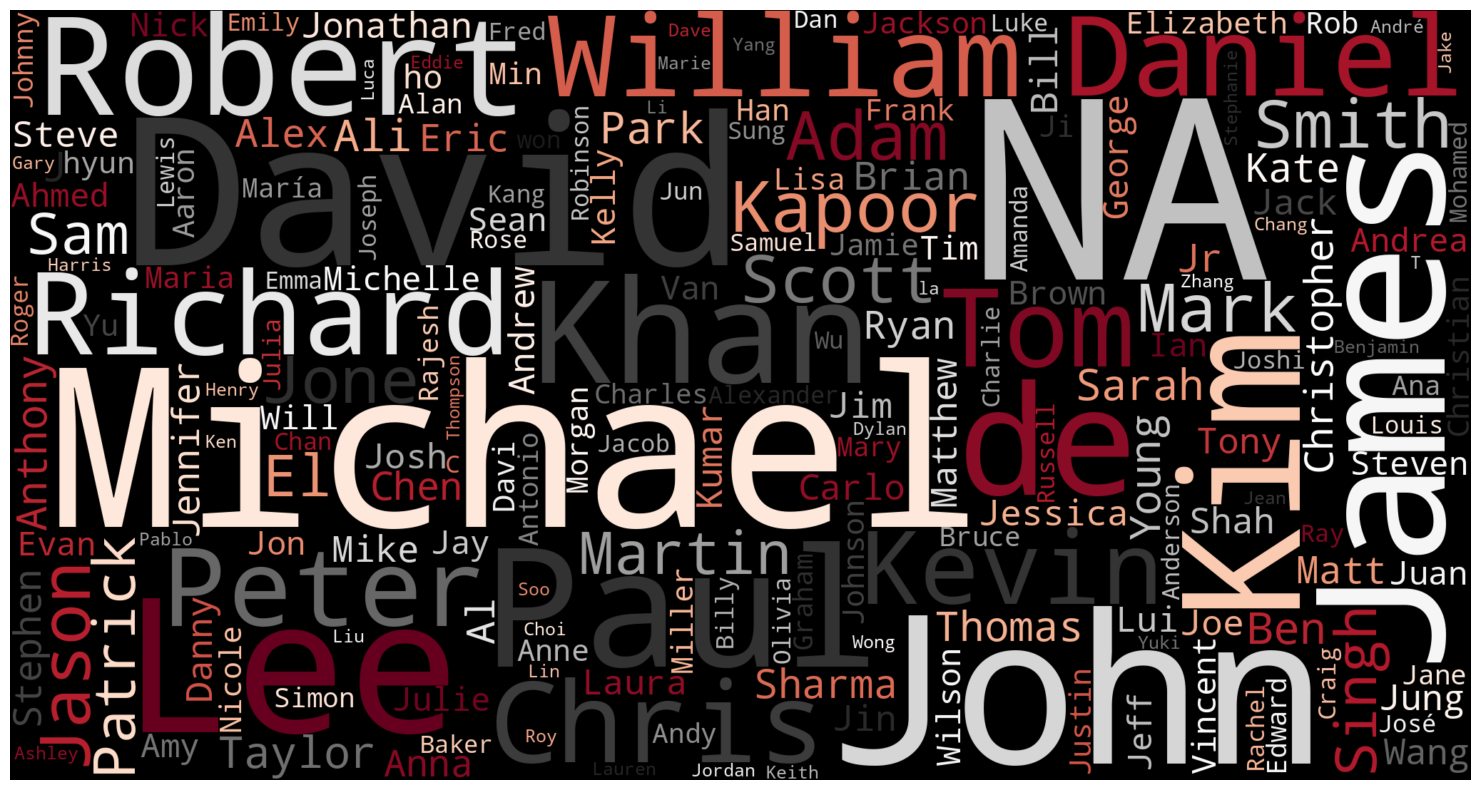

In [30]:
txt = " ".join(cast for cast in df.cast)
word_cloud = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080,colormap='RdGy').generate(txt)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WordCloud of Title

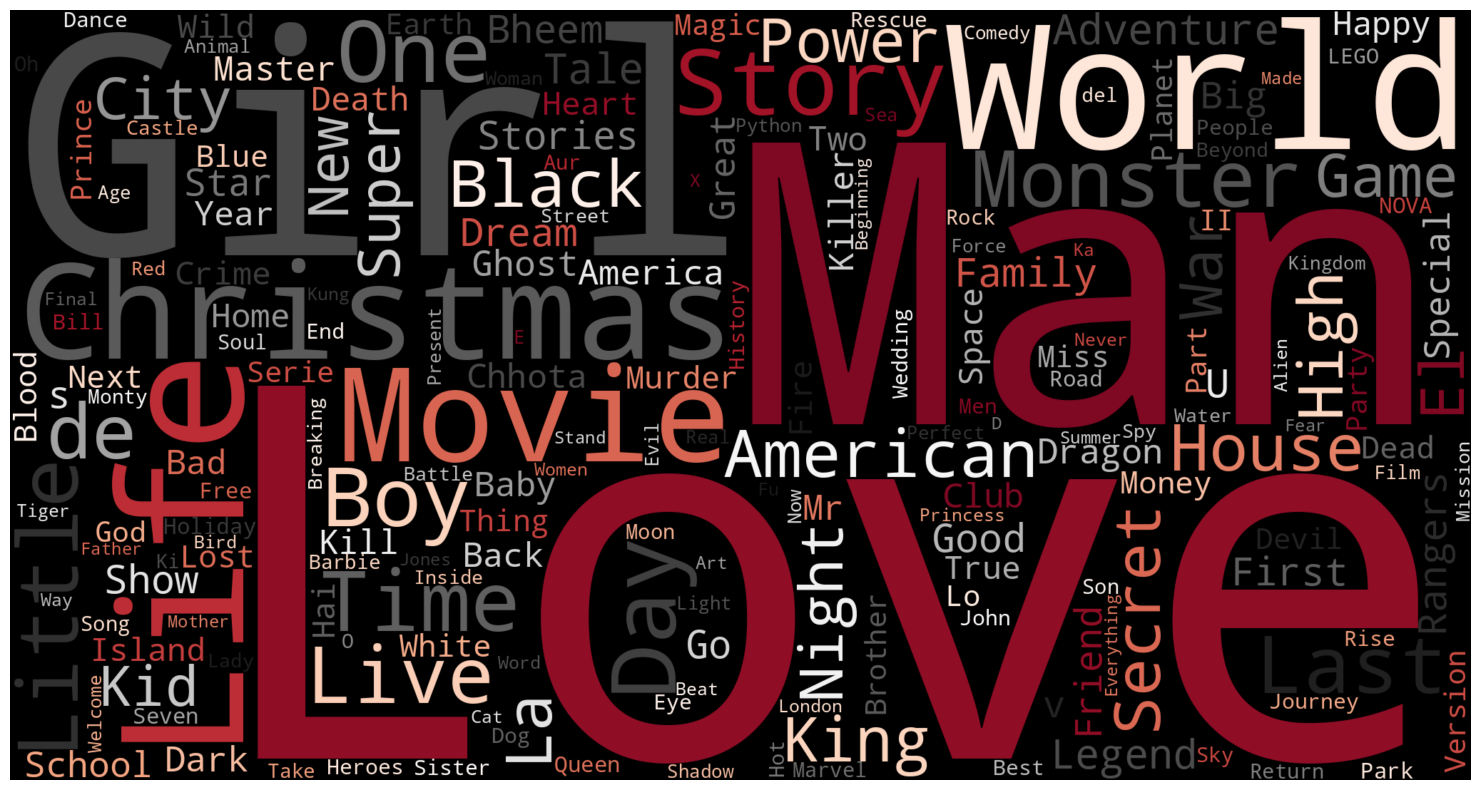

In [31]:
txt1 = " ".join(title for title in df.title)
word_cloud1 = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080,colormap='RdGy').generate(txt1)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()